# Day 08. Exercise 05
# Clustering

## 0. Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [24]:
df = pd.read_csv('../data/regression.csv')

In [25]:
df.drop('pageviews', axis=1)

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


In [26]:
X = df[['num_commits', 'AVG(diff)']]

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

Кластеризация методом K-means направлена на разбиение набора данных на k кластеров, таких, что каждый объект принадлежит кластеру с ближайшим центром кластера. Цель алгоритма — минимизировать суммарное расстояние точек кластеров от их центров.

**1. Принцип работы KMeans**

 - Инициализация центроидов:

Выбираются K случайных точек из данных (или сгенерированные случайным образом) как начальные центроиды кластеров.
 - Назначение точек кластеру:

Каждая точка данных назначается к кластеру, чей центроид находится ближе всего (с использованием, например, эвклидова расстояния).
 - Обновление центроидов:

Центроид каждого кластера пересчитывается как среднее всех точек, принадлежащих этому кластеру.
 - Повторение:

Шаги 2 и 3 повторяются, пока центроиды перестанут изменяться (или изменения станут незначительными), либо будет достигнут максимальный лимит итераци

**2. Особенности KMeans**
 - Критерий оптимизации:

    - Цель алгоритма — минимизировать сумму квадратов расстояний (Sum of Squared Errors, SSE) между точками и их центроидами:

$$
SSE = \sum_{i=1}^K \sum_{x \in C_i} \|x - \mu_i\|^2
$$

где 
𝐶𝑖 — точки в кластере 𝑖, а 𝜇𝑖 — центроид этого кластера.

 - Чувствительность к инициализации:

Разные начальные центроиды могут приводить к разным результатам. Для решения этой проблемы часто используются усовершенствованные методы инициализации, такие как KMeans++.
 - Форма кластеров:

Алгоритм лучше работает, если кластеры имеют сферическую форму, так как использует расстояние до центроида.
 - Выбор числа кластеров:

Требуется заранее задать 
𝐾
K. Для оценки подходящего значения часто используют:
Метод локтя (Elbow Method),
Коэффициент силуэта (Silhouette Score).
 - Скорость:

KMeans относительно быстр благодаря линейной временной сложности 
𝑂
(
𝑛
⋅
𝑘
⋅
𝑖
)
O(n⋅k⋅i), где 
𝑛
n — число точек, 
𝑘
k — число кластеров, 
𝑖
i — число итераций.

**3. Достоинства**
Простота реализации.
Высокая скорость работы для большого объема данных.
Широко применим для многих задач.

**4. Недостатки**
Не работает с несферическими или перекрывающимися кластерами.
Чувствителен к выбросам: один выброс может значительно сместить центроид.
Требует указания 
𝐾
K, что не всегда очевидно.


In [27]:
def visualize_clusters(model, X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)

    for cluster in unique_labels:
        if cluster == -1:  # Outliers
            cluster_points = X[labels == cluster]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c='red', label='Outliers', s=100, marker='x', alpha=0.9)
        else:  # Regular clusters
            cluster_points = X[labels == cluster]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

    plt.title(title)
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.legend()
    plt.show()



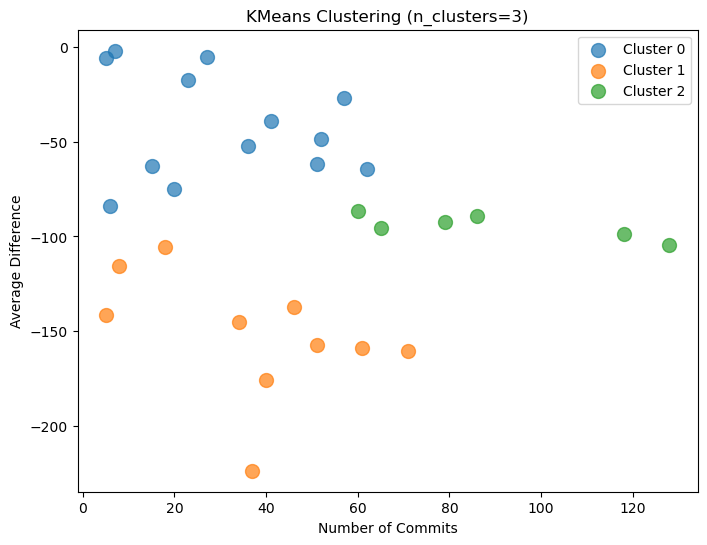

In [28]:

kmeans = KMeans(n_clusters=3, random_state=21)
kmeans_labels = kmeans.fit_predict(X)
visualize_clusters(kmeans, X, kmeans_labels, 'KMeans Clustering (n_clusters=3)')

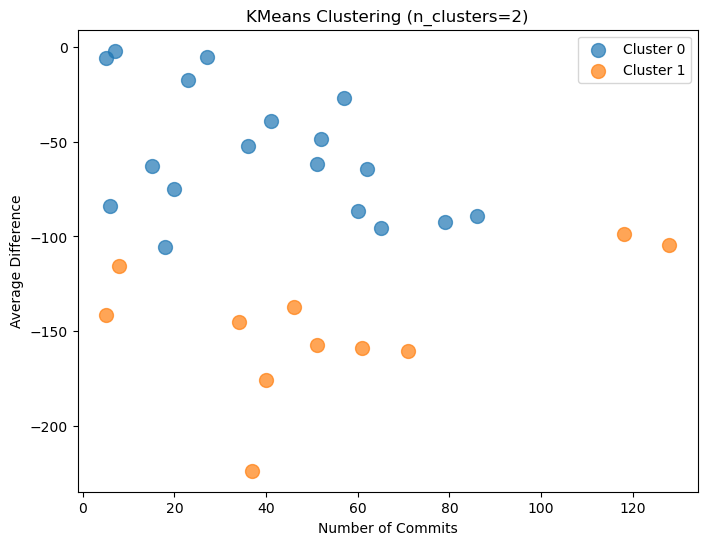

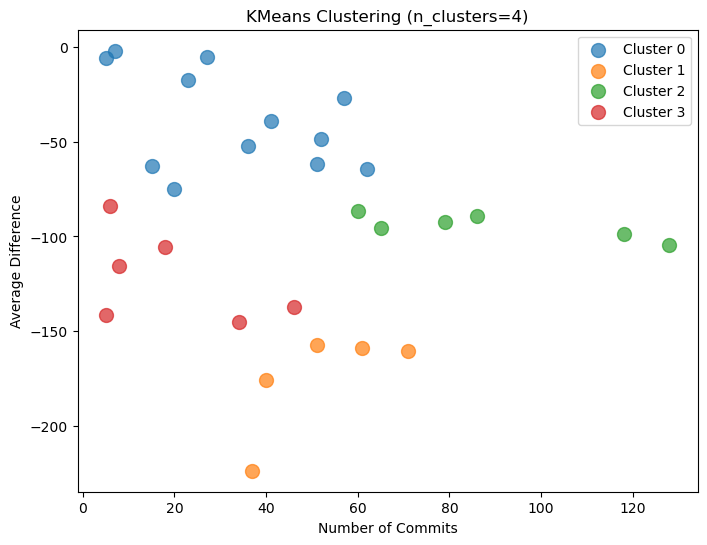

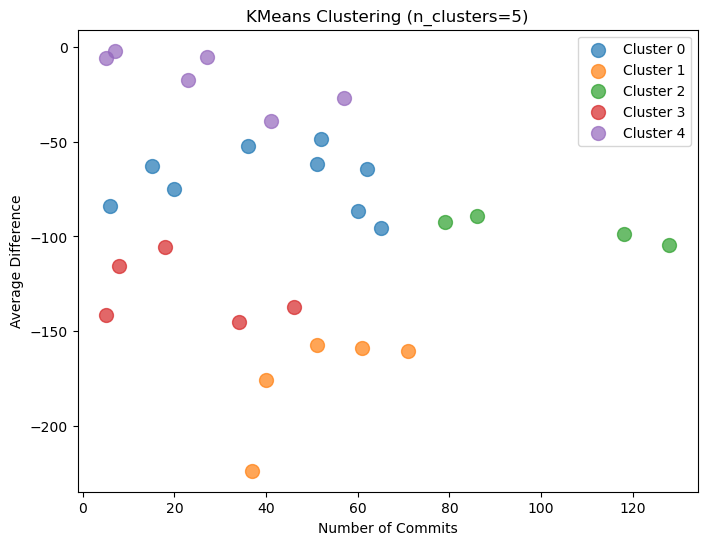

In [29]:
kmeans = KMeans(n_clusters=2, random_state=21)
kmeans_labels = kmeans.fit_predict(X)
visualize_clusters(kmeans, X, kmeans_labels, 'KMeans Clustering (n_clusters=2)')

kmeans = KMeans(n_clusters=4, random_state=21)
kmeans_labels = kmeans.fit_predict(X)
visualize_clusters(kmeans, X, kmeans_labels, 'KMeans Clustering (n_clusters=4)')

kmeans = KMeans(n_clusters=5, random_state=21)
kmeans_labels = kmeans.fit_predict(X)
visualize_clusters(kmeans, X, kmeans_labels, 'KMeans Clustering (n_clusters=5)')


Метрика Silhouette Score (коэффициент силуэта) используется для оценки качества кластеризации. Она измеряет, насколько хорошо точки внутри одного кластера близки друг к другу и насколько далеко они от точек других кластеров.
 - Диапазон значений
   -  −1: Кластеризация плохая (точки распределены неверно).
   - 0: Перекрытие кластеров (границы между ними размыты).
   - 1: Отличное разделение кластеров.

In [30]:
for i in range (2, 10):
    X = df[['num_commits', 'AVG(diff)']]
    kmeans = KMeans(n_clusters = i, random_state=21)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    print(f'Silhouette Score for KMeans (n_clusters= {i}): {kmeans_silhouette:.3f}')

Silhouette Score for KMeans (n_clusters= 2): 0.419
Silhouette Score for KMeans (n_clusters= 3): 0.445
Silhouette Score for KMeans (n_clusters= 4): 0.415
Silhouette Score for KMeans (n_clusters= 5): 0.352
Silhouette Score for KMeans (n_clusters= 6): 0.395
Silhouette Score for KMeans (n_clusters= 7): 0.396
Silhouette Score for KMeans (n_clusters= 8): 0.486
Silhouette Score for KMeans (n_clusters= 9): 0.454


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).


Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это метод кластеризации, который формирует кластеры на основе плотности точек. Этот алгоритм особенно полезен для обнаружения кластеров произвольной формы и выявления выбросов (шумовых данных).

**1. Основные концепции DBSCAN**

DBSCAN работает на основе двух параметров:

 - eps (эпсилон):
 
Радиус, определяющий окрестность точки.
Если в пределах радиуса eps находятся достаточно точек, эта точка считается "плотной".
 - min_samples:

Минимальное количество точек (включая саму точку), необходимых для того, чтобы область считалась кластером.

**2. Как работает DBSCAN**

1. Инициализация:

Алгоритм случайно выбирает точку из данных.
2. Поиск окрестности:

Для выбранной точки вычисляется число точек в радиусе eps.
3. Кластеризация:

 - Если точка — ядровая, создается новый кластер, и все точки в радиусе eps добавляются в этот кластер.
 - Если точка — граничная, она добавляется к существующему кластеру.
 - Если точка — шумовая, она помечается как выброс и не включается в кластеры.
4. Расширение кластеров:

Для всех ядровых точек, связанных друг с другом через другие ядровые точки, кластер продолжает расширяться.
5. Завершение:

Алгоритм заканчивается, когда все точки обработаны.

**3. Преимущества DBSCAN**
 - Формы кластеров:

Может находить кластеры произвольной формы, в отличие от KMeans.
 - Шум:

Автоматически определяет и помечает выбросы.
 - Число кластеров:

Не требует заранее задавать количество кластеров (
𝐾
K).
 - Метрики расстояния:

Работает с различными метриками расстояния, например, эвклидово, косинусное и др.

**4. Ограничения DBSCAN**
 - Чувствительность к параметрам:

Выбор значений eps и min_samples сильно влияет на результат кластеризации.
 - Разная плотность кластеров:

Алгоритм плохо справляется, если плотность кластеров значительно различается.
 - Высокая сложность:

Для больших данных сложность может достигать O($n^2$), хотя существуют оптимизации.

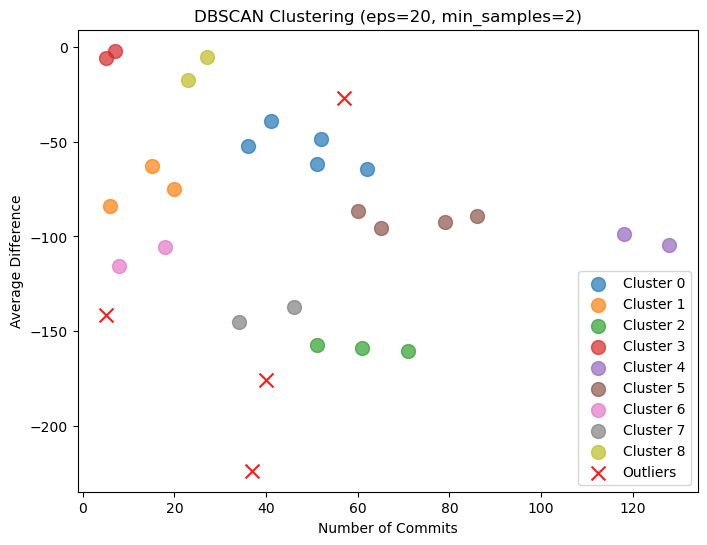

In [31]:
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)
visualize_clusters(dbscan, X, dbscan_labels, 'DBSCAN Clustering (eps=20, min_samples=2)')


In [32]:
for i in range (10, 50):
        X = df[['num_commits', 'AVG(diff)']]
        dbscan = DBSCAN(eps=i, min_samples=2)
        dbscan_labels = dbscan.fit_predict(X)
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if num_clusters > 1:  # Silhouette Score можно считать только если кластеров больше 1
                dbscan_silhouette = silhouette_score(X, dbscan_labels)
                print(f'Silhouette Score for DBSCAN(eps={i}, min_samples=2): {dbscan_silhouette:.3f}')
        else:
                print(f'DBSCAN(eps={i}, min_samples=2): Less than 2 clusters (Silhouette Score not calculated)')


Silhouette Score for DBSCAN(eps=10, min_samples=2): -0.079
Silhouette Score for DBSCAN(eps=11, min_samples=2): -0.075
Silhouette Score for DBSCAN(eps=12, min_samples=2): 0.046
Silhouette Score for DBSCAN(eps=13, min_samples=2): 0.129
Silhouette Score for DBSCAN(eps=14, min_samples=2): 0.252
Silhouette Score for DBSCAN(eps=15, min_samples=2): 0.347
Silhouette Score for DBSCAN(eps=16, min_samples=2): 0.347
Silhouette Score for DBSCAN(eps=17, min_samples=2): 0.383
Silhouette Score for DBSCAN(eps=18, min_samples=2): 0.383
Silhouette Score for DBSCAN(eps=19, min_samples=2): 0.383
Silhouette Score for DBSCAN(eps=20, min_samples=2): 0.383
Silhouette Score for DBSCAN(eps=21, min_samples=2): 0.465
Silhouette Score for DBSCAN(eps=22, min_samples=2): 0.479
Silhouette Score for DBSCAN(eps=23, min_samples=2): 0.388
Silhouette Score for DBSCAN(eps=24, min_samples=2): 0.337
Silhouette Score for DBSCAN(eps=25, min_samples=2): 0.344
Silhouette Score for DBSCAN(eps=26, min_samples=2): 0.344
Silhouette S

In [45]:
for i in range(1, 6):
    dbscan = DBSCAN(eps=22, min_samples=i)
    dbscan_labels = dbscan.fit_predict(X)

    # Проверка количества уникальных кластеров (исключая шумовые точки с меткой -1)
    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    
    if num_clusters > 1:  # Silhouette Score можно считать только если кластеров больше 1
        dbscan_silhouette = silhouette_score(X, dbscan_labels)
        print(f'Silhouette Score for DBSCAN(eps=20, min_samples={i}): {dbscan_silhouette:.3f}')
    else:
        print(f'DBSCAN(eps=20, min_samples={i}): Less than 2 clusters (Silhouette Score not calculated)')


Silhouette Score for DBSCAN(eps=20, min_samples=1): 0.487
Silhouette Score for DBSCAN(eps=20, min_samples=2): 0.479
Silhouette Score for DBSCAN(eps=20, min_samples=3): 0.360
Silhouette Score for DBSCAN(eps=20, min_samples=4): 0.146
Silhouette Score for DBSCAN(eps=20, min_samples=5): 0.058


In [34]:
for i in range(2, 6):
    for j in range (10, 35, 5):
        dbscan = DBSCAN(eps=j, min_samples=i)
        dbscan_labels = dbscan.fit_predict(X)
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)   
        if num_clusters > 1: 
            dbscan_silhouette = silhouette_score(X, dbscan_labels)
            print(f'Silhouette Score for DBSCAN(eps={j}, min_samples={i}): {dbscan_silhouette:.3f}')
        else:
            print(f'DBSCAN(eps={j}, min_samples={i}): Less than 2 clusters (Silhouette Score not calculated)')


Silhouette Score for DBSCAN(eps=10, min_samples=2): -0.079
Silhouette Score for DBSCAN(eps=15, min_samples=2): 0.347
Silhouette Score for DBSCAN(eps=20, min_samples=2): 0.383
Silhouette Score for DBSCAN(eps=25, min_samples=2): 0.344
Silhouette Score for DBSCAN(eps=30, min_samples=2): 0.199
DBSCAN(eps=10, min_samples=3): Less than 2 clusters (Silhouette Score not calculated)
Silhouette Score for DBSCAN(eps=15, min_samples=3): -0.006
Silhouette Score for DBSCAN(eps=20, min_samples=3): 0.047
Silhouette Score for DBSCAN(eps=25, min_samples=3): 0.323
DBSCAN(eps=30, min_samples=3): Less than 2 clusters (Silhouette Score not calculated)
DBSCAN(eps=10, min_samples=4): Less than 2 clusters (Silhouette Score not calculated)
DBSCAN(eps=15, min_samples=4): Less than 2 clusters (Silhouette Score not calculated)
Silhouette Score for DBSCAN(eps=20, min_samples=4): -0.027
Silhouette Score for DBSCAN(eps=25, min_samples=4): 0.321
Silhouette Score for DBSCAN(eps=30, min_samples=4): 0.379
DBSCAN(eps=10, 

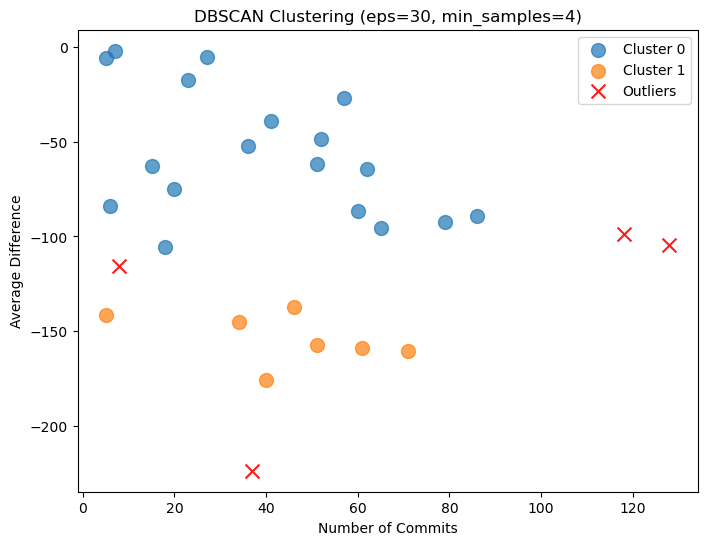

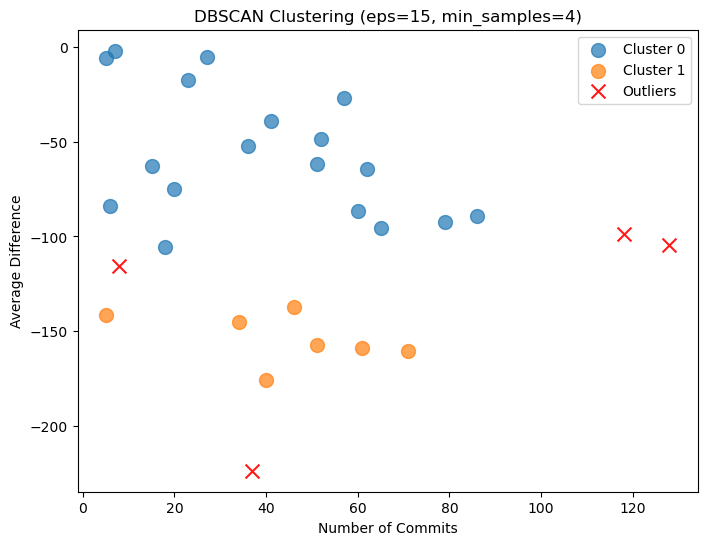

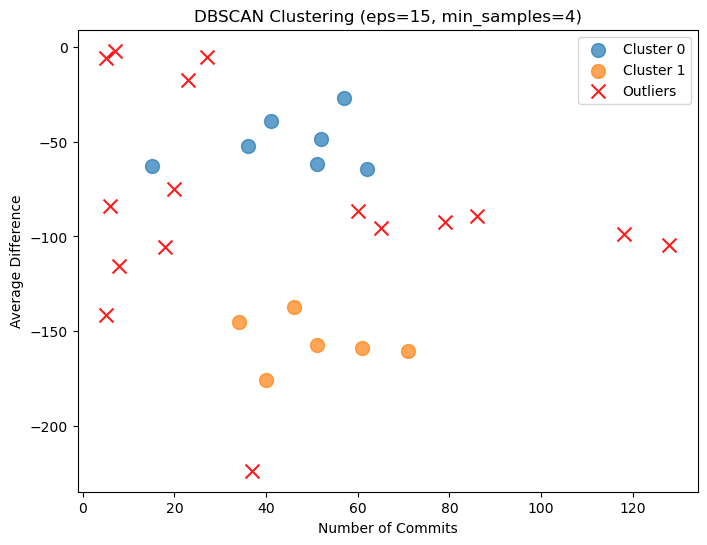

In [35]:
dbscan = DBSCAN(eps=30, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)
visualize_clusters(dbscan, X, dbscan_labels, 'DBSCAN Clustering (eps=30, min_samples=4)')

dbscan = DBSCAN(eps=30, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)
visualize_clusters(dbscan, X, dbscan_labels, 'DBSCAN Clustering (eps=15, min_samples=4)')

dbscan = DBSCAN(eps=25, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
visualize_clusters(dbscan, X, dbscan_labels, 'DBSCAN Clustering (eps=15, min_samples=4)')


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

Hierarchical (агломеративный) алгоритм кластеризации — это метод, который строит иерархию кластеров, группируя данные либо снизу вверх (агломеративный метод), либо сверху вниз (дискретный метод)

**Как работает Agglomerative Clustering**
1. Инициализация: Каждый объект в данных рассматривается как отдельный кластер (всего 
𝑛 кластеров).

2. Итерации:

- На каждом шаге выбираются два ближайших кластера и объединяются в один.
- Расстояние между кластерами рассчитывается по одному из выбранных критериев:
  - Single linkage (ближайший сосед): минимальное расстояние между точками двух кластеров.
  - Complete linkage (дальний сосед): максимальное расстояние между точками двух кластеров.
  - Average linkage: среднее расстояние между точками двух кластеров.
  - Ward’s linkage: минимизация увеличения дисперсии внутри кластеров при их объединении.
3. Остановка: Процесс продолжается до тех пор, пока не останется заданное количество кластеров 
𝑘 или пока все объекты не объединятся в один кластер.

4. Результат: Создается иерархическое дерево (дендрограмма), которое визуализирует процесс объединения кластеров.

**Особенности и преимущества**
- *Не нужно задавать k заранее:* хотя 𝑘 можно указать для завершения объединений, это не обязательное требование.
- *Дендрограмма*: позволяет визуально определить оптимальное количество кластеров, изучая, на каком шаге расстояние между объединяемыми кластерами резко увеличивается.
- *Работает с различными типами расстояний:* например, Евклидово, косинусное, Манхэттенское и т. д.
- *Не требует плотности данных:* в отличие от DBSCAN, иерархический метод хорошо работает, даже если плотность кластеров неоднородная.

**Недостатки**
 - Время вычислений: агломеративный метод работает медленнее по сравнению с KMeans и DBSCAN, так как требует 
$𝑂(𝑛^3)$ операций для полной дендрограммы.
 - Чувствительность к выбросам: выбросы могут исказить структуру кластеров.
 - Память: метод хранит матрицу расстояний, что может стать проблемой для больших наборов данных.

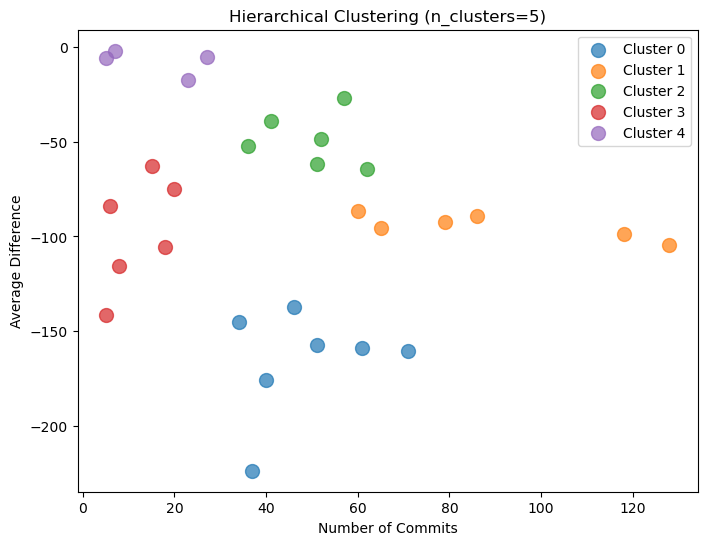

In [36]:
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X)
visualize_clusters(hierarchical, X, hierarchical_labels, 'Hierarchical Clustering (n_clusters=5)')


In [37]:
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.3f}')


Silhouette Score for Hierarchical Clustering: 0.464


Silhouette Score for Hierarchical Clustering: 0.359


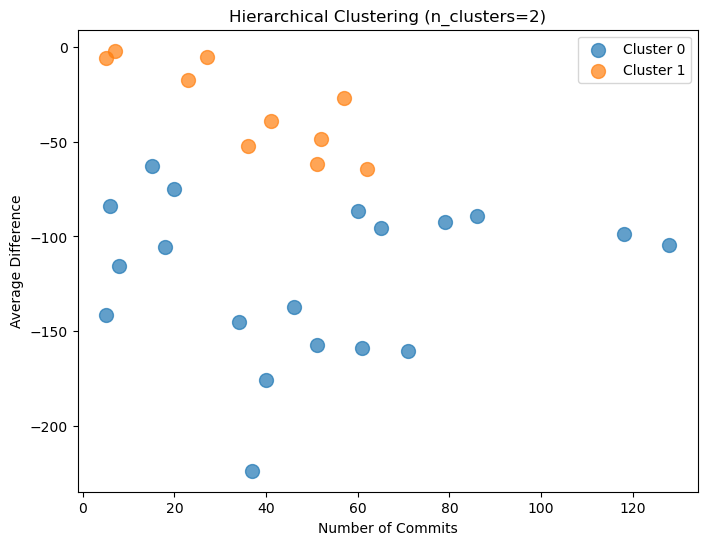

Silhouette Score for Hierarchical Clustering: 0.339


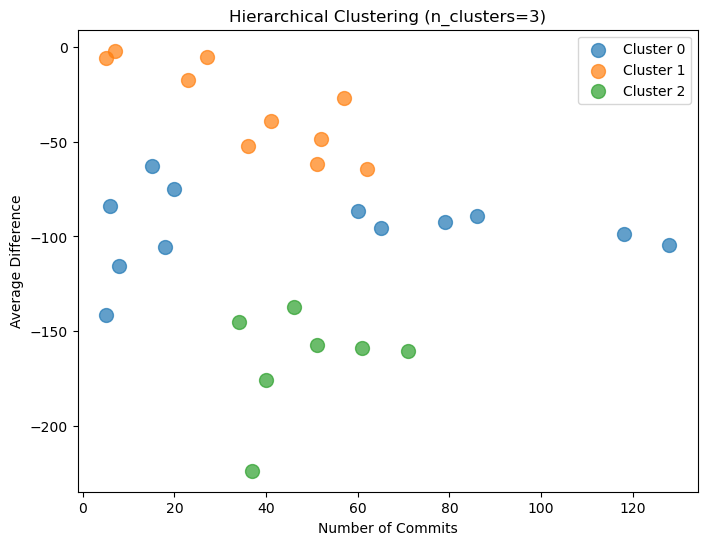

Silhouette Score for Hierarchical Clustering: 0.445


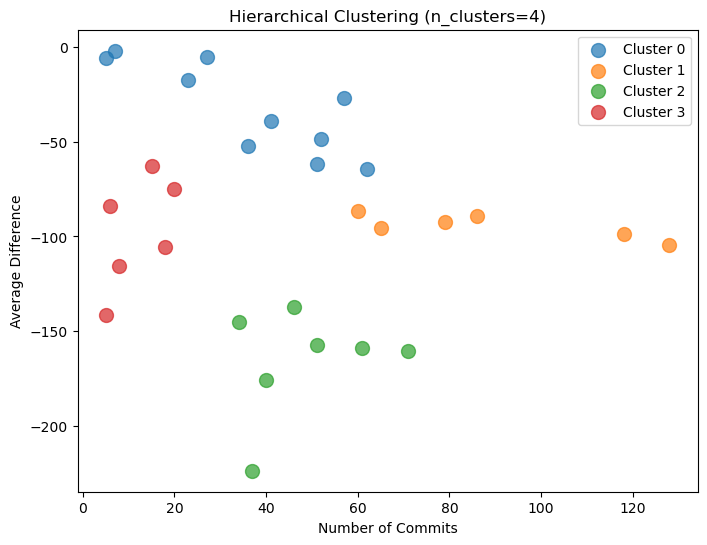

Silhouette Score for Hierarchical Clustering: 0.464


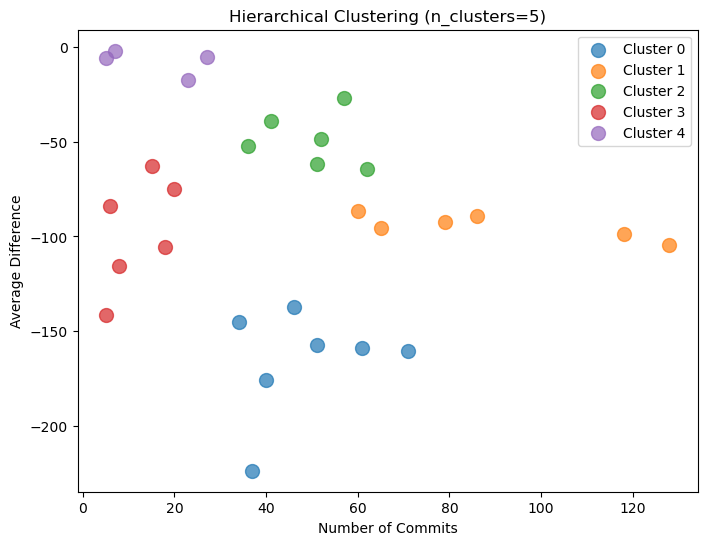

Silhouette Score for Hierarchical Clustering: 0.453


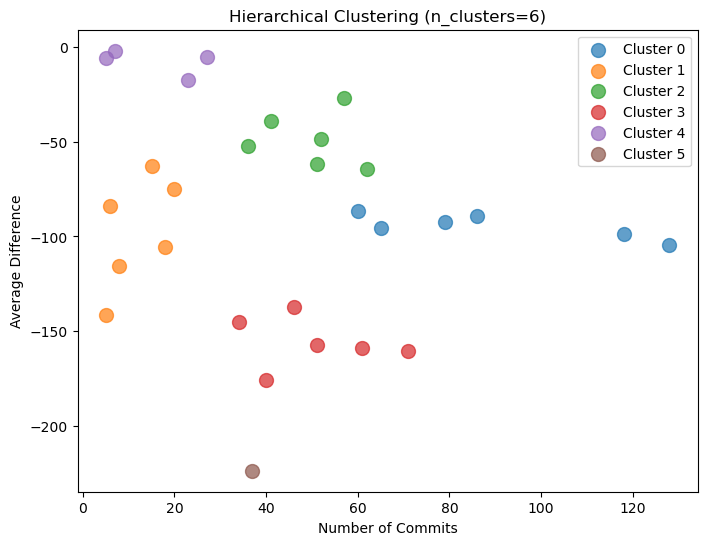

Silhouette Score for Hierarchical Clustering: 0.487


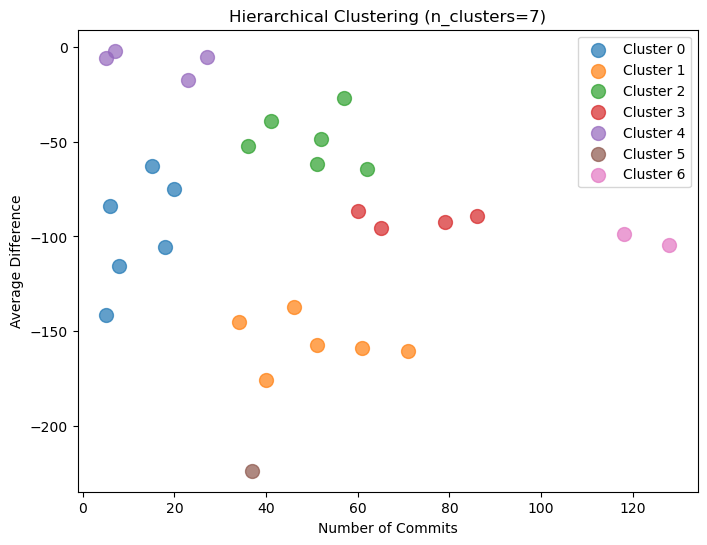

Silhouette Score for Hierarchical Clustering: 0.508


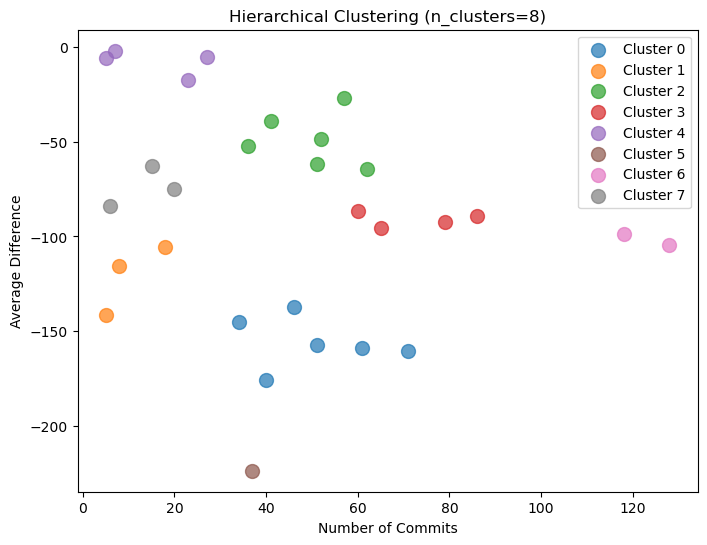

Silhouette Score for Hierarchical Clustering: 0.476


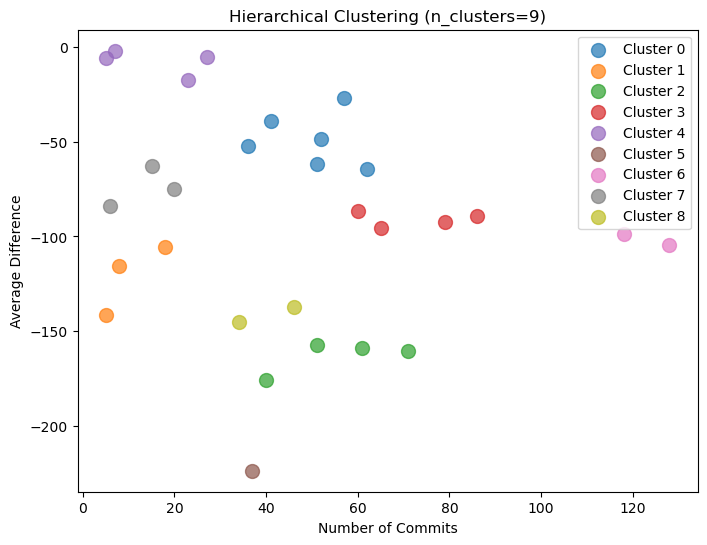

In [38]:
for i in range (2, 10):
    hierarchical = AgglomerativeClustering(n_clusters=i)
    hierarchical_labels = hierarchical.fit_predict(X)
    hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
    print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.3f}')
    visualize_clusters(hierarchical, X, hierarchical_labels, f'Hierarchical Clustering (n_clusters={i})')


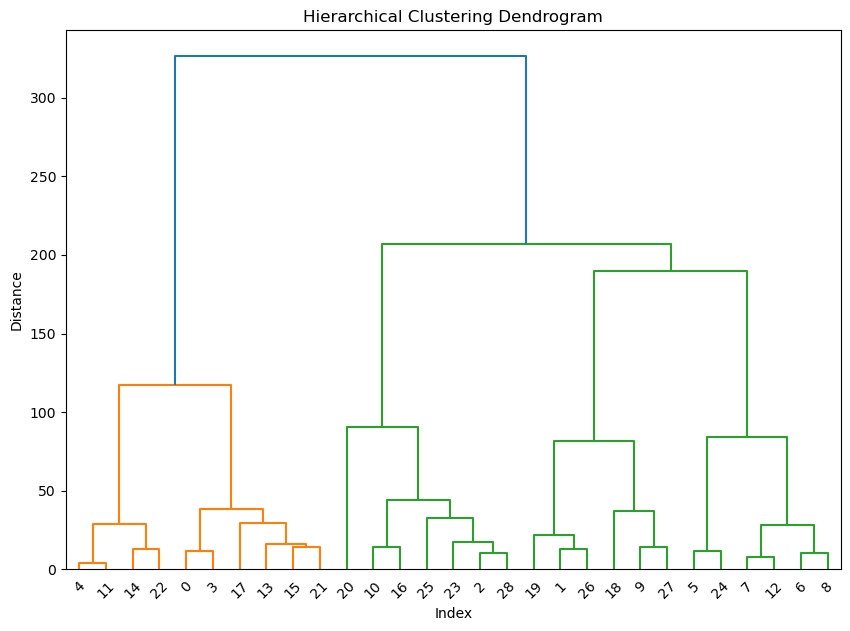

In [39]:
# Dendrogram
plt.figure(figsize=(10, 7))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

Дендрограмма визуализирует процесс объединения кластеров в иерархическом методе кластеризации. Она представляет собой дерево, где:

1. *Каждый объект данных* вначале рассматривается как отдельный кластер, находящийся на нижнем уровне дерева.
2. *Узлы (ветви)* дерева соединяют кластеры по мере их объединения, начиная с самых близких (по заданному расстоянию, например, Евклидову).
3. *Высота узла* отображает расстояние (или разницу) между объединяемыми кластерами. Чем выше узел, тем более различны объединяемые группы.

По нашей дендограмме можно предположить, что оптимальное число кластеров - 3

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [40]:
def optimize_clustering(model_class, params, param_name, param_range):
    scores = []  # Список для хранения silhouette_score для каждого значения параметра
    for value in param_range:  # Перебор значений параметра
        params[param_name] = value  # Обновляем значение оптимизируемого параметра
        model = model_class(**params)  # Создаём модель с текущими параметрами
        labels = model.fit_predict(X) 
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) 

        if num_clusters > 1:  
            score = silhouette_score(X, labels) 
        else:
            score = -1  # Если только один кластер, score недействителен
        scores.append(score)  # Сохраняем результат

    best_value = param_range[np.argmax(scores)]  # Находим значение параметра с максимальным score
    best_model = model_class(**{**params, param_name: best_value})  # Создаём модель с лучшим параметром
    best_labels = best_model.fit_predict(X)  

    # Построение графиков
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes[0].plot(param_range, scores, marker='o')  # График зависимости silhouette_score от параметра
    axes[0].set_title(f'Silhouette Score vs {param_name}')
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel('Silhouette Score')

    scatter = axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)  # Визуализация кластеров
    axes[1].set_title(f'Best Clustering ({param_name}={best_value})')
    axes[1].set_xlabel('Number of Commits')
    axes[1].set_ylabel('Average Difference')

    plt.show() 
    return best_value, scores  # Возвращаем лучшее значение параметра и список оценок



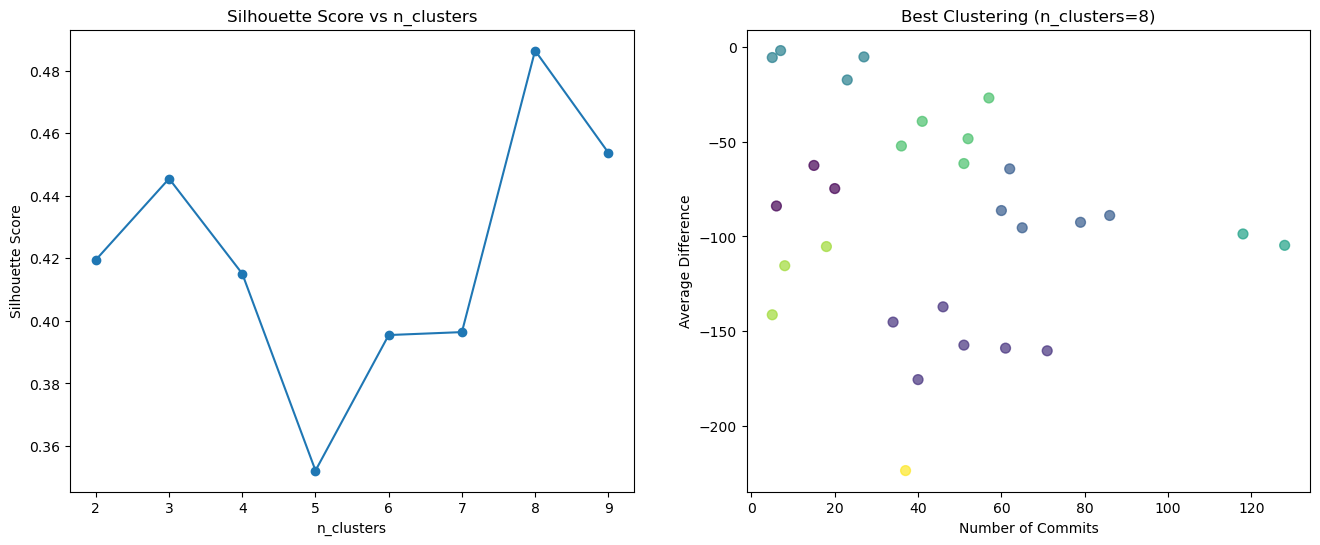

Best n_clusters for KMeans: 8


In [41]:

best_k, scores = optimize_clustering(KMeans, {"random_state": 21}, "n_clusters", range(2, 10))
print(f'Best n_clusters for KMeans: {best_k}')


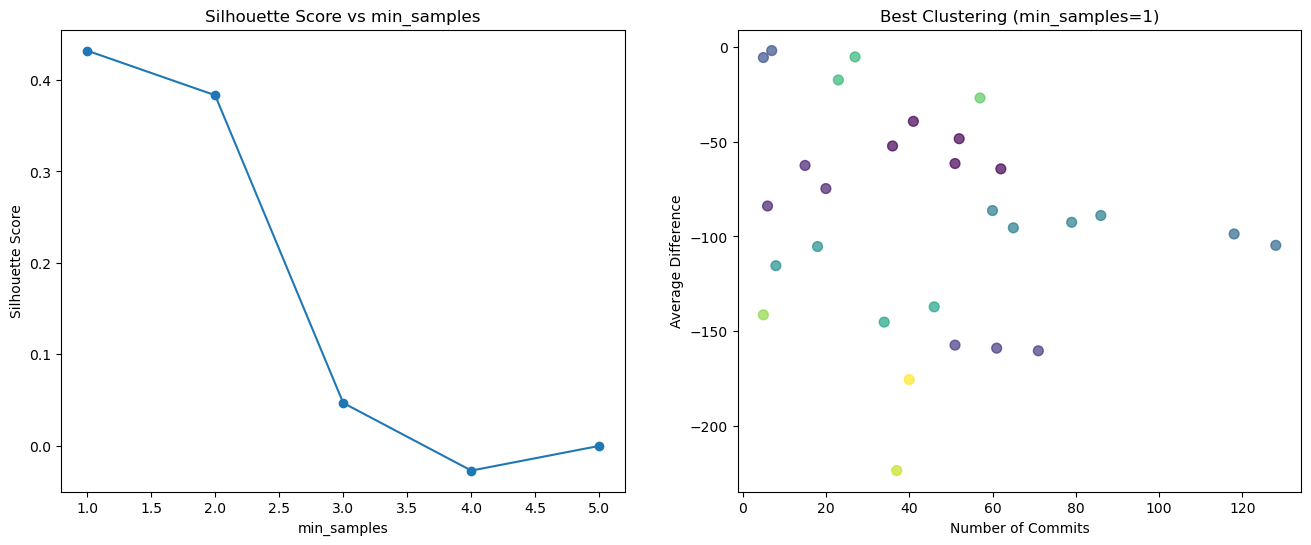

Best min_samples for DBSCAN: 1


In [42]:

best_k, scores = optimize_clustering(DBSCAN, {"eps": 20}, "min_samples", range(1, 6))
print(f'Best min_samples for DBSCAN: {best_k}')


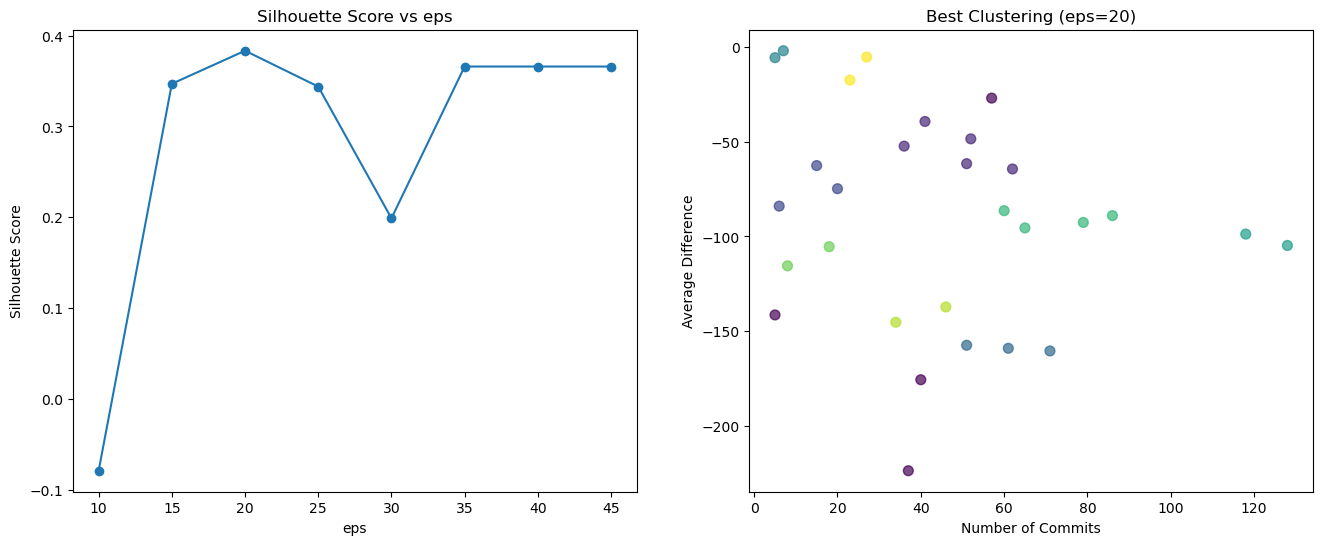

Best eps for DBSCAN: 20


In [43]:

best_k, scores = optimize_clustering(DBSCAN, {"min_samples": 2}, "eps", range(10, 50, 5))
print(f'Best eps for DBSCAN: {best_k}')